Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection & Processing

In [3]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')


EDA

In [4]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise = pd.read_csv('/content/exercise.csv')

In [6]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [7]:
df = exercise.merge(calories,on='User_ID')

In [8]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


<ipython-input-11-4a6ee558c30b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')  # x= for vertical, palette= for colors


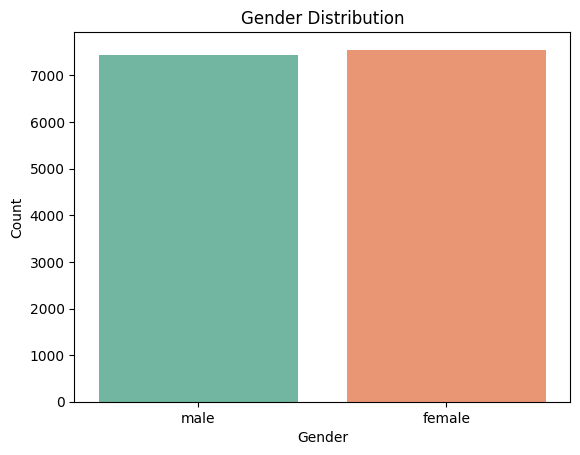

In [11]:
sns.countplot(x='Gender', data=df, palette='Set2')  # x= for vertical, palette= for colors
plt.title('Gender Distribution')  # title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [12]:
df.shape

(15000, 9)

<Axes: xlabel='Duration', ylabel='Calories'>

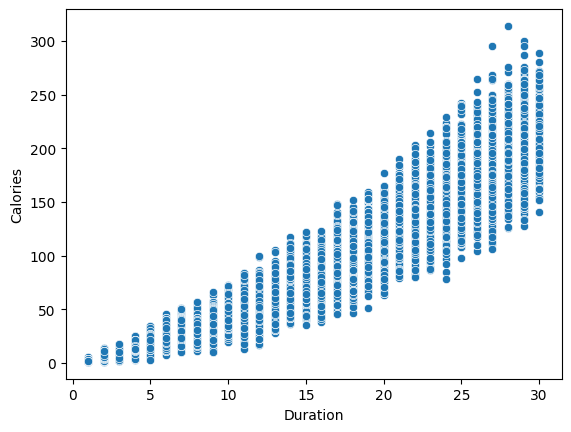

In [13]:
sns.scatterplot(x=df['Duration'],y=df['Calories'])

<Axes: xlabel='Heart_Rate', ylabel='Calories'>

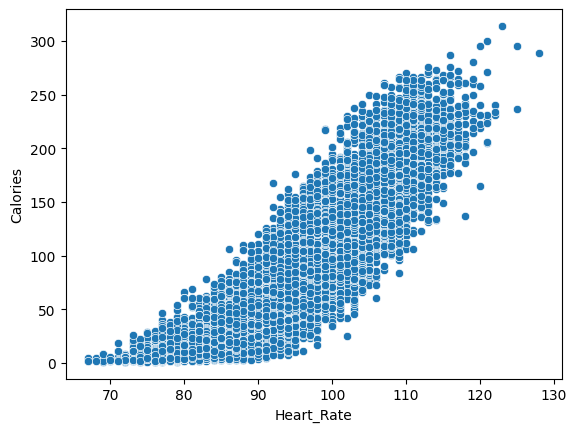

In [14]:
sns.scatterplot(x=df['Heart_Rate'],y=df['Calories'])

In [15]:
df.replace({"Gender":{'male':0,'female':1}}, inplace=True)

<ipython-input-15-32aa756eddd8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Gender":{'male':0,'female':1}}, inplace=True)


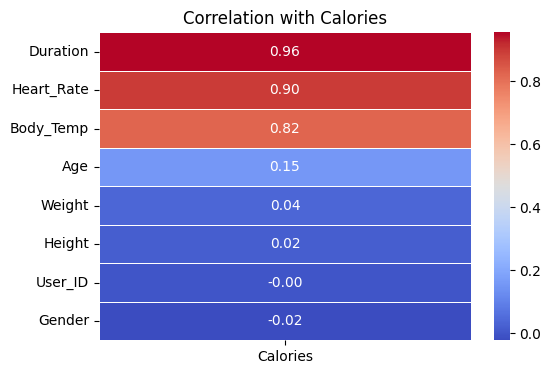

In [16]:
# Correlation with target variable only
cal_corr = df.corr()['Calories'].drop('Calories').sort_values(ascending=False)

# Convert to DataFrame for heatmap
cal_corr_df = pd.DataFrame(cal_corr)

plt.figure(figsize=(6, 4))
sns.heatmap(cal_corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation with Calories")
plt.show()


In [17]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Finding the Correlation in the dataset

Positive Correlation

Negative Correlation

In [18]:
correlation = df.corr()

Training

In [19]:
x = df.drop(['User_ID','Calories'],axis=1)
y = df['Calories']

In [20]:
x.shape

(15000, 7)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [23]:
x_train.shape

(12000, 7)

Model Training

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
models = {
    'lr': LinearRegression(),
    'rd': Ridge(),
    'ls': Lasso(),
    'dtr': DecisionTreeRegressor(),
    'rfr': RandomForestRegressor()
}

In [26]:
for name, mod in models.items():
    mod.fit(x_train, y_train)
    y_pred = mod.predict(X_test)

    print(f"{name}  MSE: {mean_squared_error(y_test, y_pred)}, Score: {r2_score(y_test, y_pred)}")

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(X_test)

import pickle

pickle.dump(rfr, open('rfr.pkl', 'wb'))
x_train.to_csv('x_train.csv')

lr  MSE: 131.9957457508169, Score: 0.9672937151257295
rd  MSE: 131.99625903139352, Score: 0.9672935879435944
ls  MSE: 143.82689461175067, Score: 0.9643621590908397
dtr  MSE: 26.962, Score: 0.9933192782254907
rfr  MSE: 7.3376399333333335, Score: 0.9981818585091562


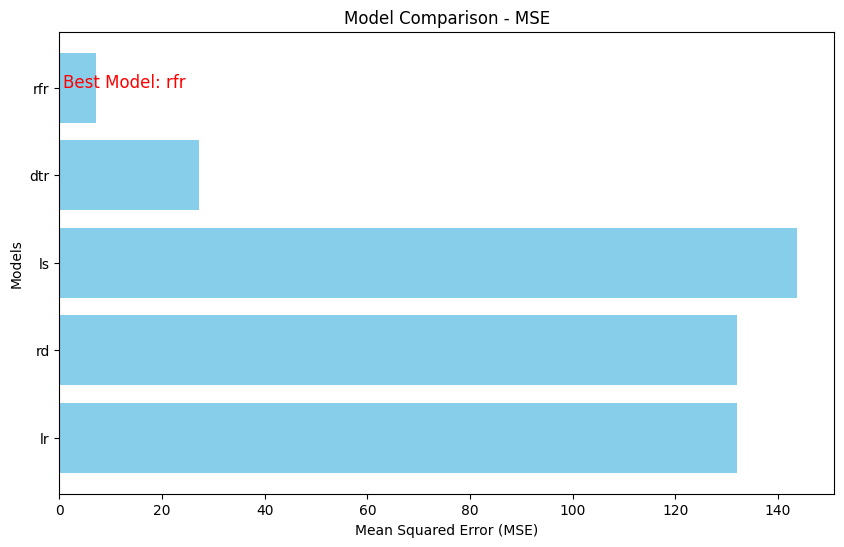

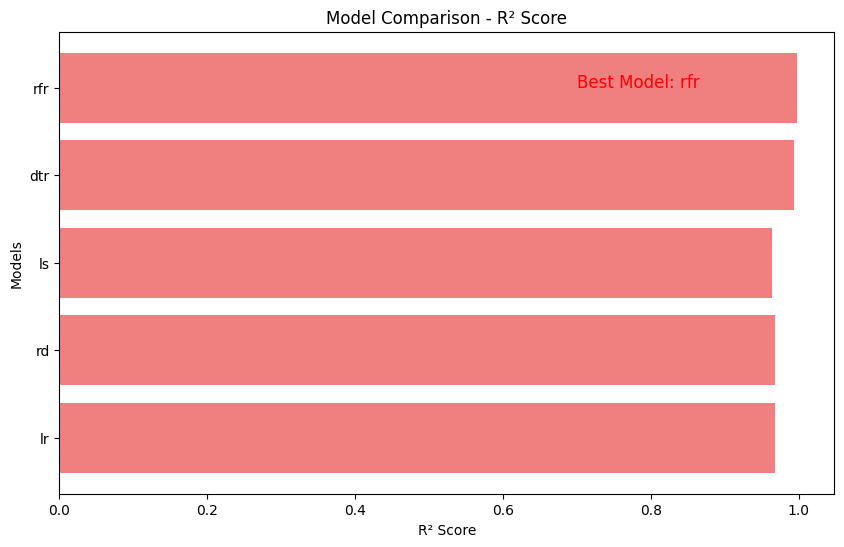

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Store the performance metrics in a list
results = []

for name, mod in models.items():
    mod.fit(x_train, y_train)
    y_pred = mod.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the results for later comparison
    results.append({'Model': name, 'MSE': mse, 'R2': r2})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# MSE comparison
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['MSE'], color='skyblue')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Models')
plt.title('Model Comparison - MSE')

# Find the best model (with the lowest MSE)
best_model_mse = results_df.loc[results_df['MSE'].idxmin(), 'Model']
plt.text(0.7, results_df['MSE'].idxmin(), f"Best Model: {best_model_mse}", color='red', fontsize=12)
plt.show()

# R² Score comparison
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['R2'], color='lightcoral')
plt.xlabel('R² Score')
plt.ylabel('Models')
plt.title('Model Comparison - R² Score')

# Find the best model (with the highest R² score)
best_model_r2 = results_df.loc[results_df['R2'].idxmax(), 'Model']
plt.text(0.7, results_df['R2'].idxmax(), f"Best Model: {best_model_r2}", color='red', fontsize=12)
plt.show()
